In [89]:
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

# THE START OF OUR PROGRAM

In [58]:
# Load dataset
dataset = pd.read_csv('lung_cancer_examples.csv')

In [59]:
# View dataset
print(f"Dataset sample:\n\n{dataset.head()}")

Dataset sample:

     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


In [60]:
# Rename the columns
dataset = dataset.rename(columns={'Name': 'FIRST_NAME', 'Surname': 'LAST_NAME','Age': 'AGE', 'Smokes': 'CIG_PER_DAY', 'AreaQ': 'CANCER_AREA', 'Alkhol': 'ALC_PER_DAY', 'Result': 'CANCER_RISK'})

# FIRST_NAME = First name of the patient
# LAST_NAME = Last name of the patient
# AGE = Age of the patient
# CIG_PER_DAY = Number of cigarettes smoked per day by the respective patient
# CANCER_AREA = Area of the lung affected by cancer
# ALC_PER_DAY = Number of alcoholic drinks consumed per day by the respective patient
# CANCER_RISK = Risk of cancer (1 = High risk, 0 = Low risk)

In [61]:
dataset.head()

,FIRST_NAME,LAST_NAME,AGE,CIG_PER_DAY,CANCER_AREA,ALC_PER_DAY,CANCER_RISK
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [62]:
# Check attribute quantity and entity quantity
print(f"Number of entities: {dataset.shape[0]}\nNumber of attributes: {dataset.shape[1]}")

Number of entities: 59
Number of attributes: 7


In [63]:
# View dataset information
print(f"Dataset info:\n\n{dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FIRST_NAME   59 non-null     object
 1   LAST_NAME    59 non-null     object
 2   AGE          59 non-null     int64 
 3   CIG_PER_DAY  59 non-null     int64 
 4   CANCER_AREA  59 non-null     int64 
 5   ALC_PER_DAY  59 non-null     int64 
 6   CANCER_RISK  59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB
Dataset info:

None


# Plotting Data In The form Of Graphs

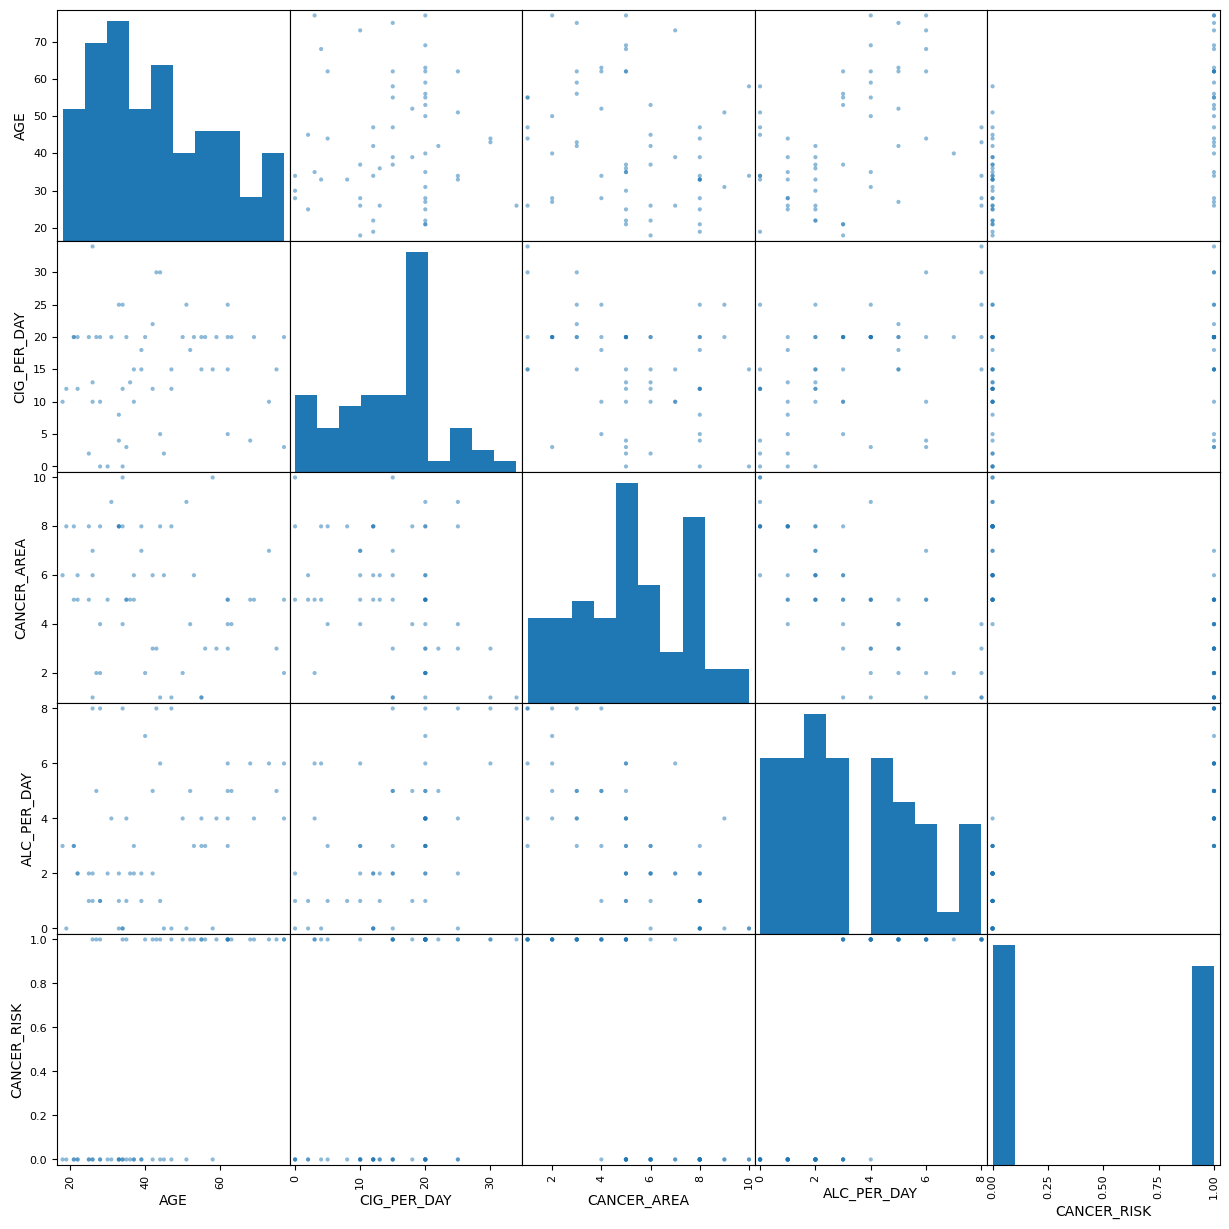

In [64]:
# View attribute relationships
scatter_matrix(dataset, figsize=(15, 15))
plt.show()

# Analyzing Or Visualizing The Plot With Each Other Attribute

In [65]:
A = dataset[dataset.CANCER_RISK==1]
B = dataset[dataset.CANCER_RISK==0]

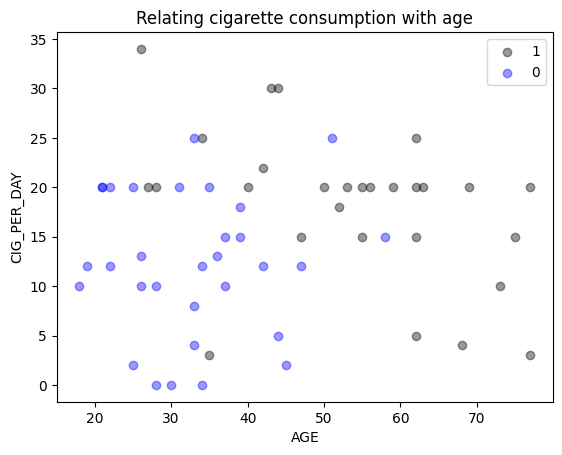

In [66]:
# Cigarettes per day vs Age
plt.scatter(A.AGE, A.CIG_PER_DAY, color="Black", label="1", alpha=0.4)
plt.scatter(B.AGE, B.CIG_PER_DAY, color="Blue", label="0", alpha=0.4)
plt.xlabel("AGE")
plt.ylabel("CIG_PER_DAY")
plt.legend()
plt.title("Relating cigarette consumption with age")
plt.show()

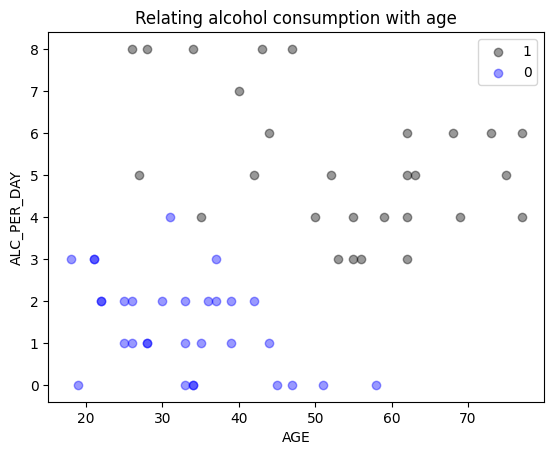

In [67]:
# Alcohol consumed per day vs Age
plt.scatter(A.AGE, A.ALC_PER_DAY, color="Black", label="1", alpha=0.4)
plt.scatter(B.AGE, B.ALC_PER_DAY, color="Blue", label="0", alpha=0.4)
plt.xlabel("AGE")
plt.ylabel("ALC_PER_DAY")
plt.legend()
plt.title("Relating alcohol consumption with age")
plt.show()

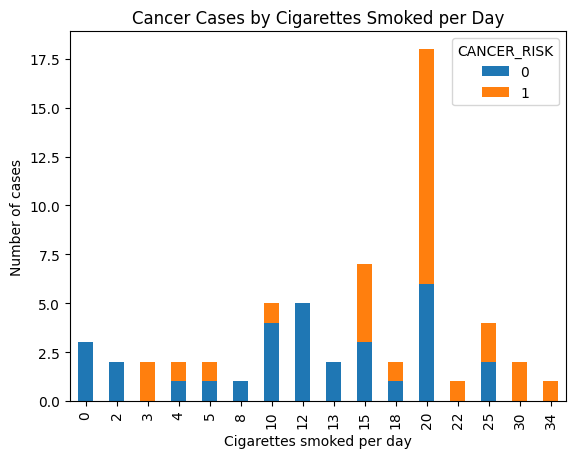

In [68]:
# Relate cancer risk with smoking
grouped = dataset.groupby('CIG_PER_DAY')['CANCER_RISK'].value_counts().unstack()
grouped.plot(kind='bar', stacked=True)
plt.ylabel('Number of cases')
plt.xlabel('Cigarettes smoked per day')
plt.title('Cancer Cases by Cigarettes Smoked per Day')
plt.show()

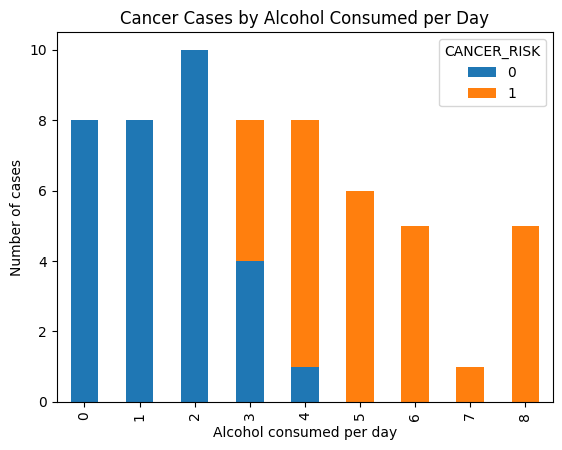

In [69]:
# Relate cancer risk with alcohol consumption
grouped = dataset.groupby('ALC_PER_DAY')['CANCER_RISK'].value_counts().unstack()
grouped.plot(kind='bar', stacked=True)
plt.ylabel('Number of cases')
plt.xlabel('Alcohol consumed per day')
plt.title('Cancer Cases by Alcohol Consumed per Day')
plt.show()